# AR(p) Parameter Estimation

The $\text{AR}(p)$ process is defined by,

$
\begin{align}
X_t = \sum_{i=1}^p \varphi_i X_{t-i} + \varepsilon_{t}
\end{align}
$

where,

$
\begin{align}
\varepsilon_t \sim \text{Normal}(0, \sigma^2)
\end{align}
$

The Yule-Walker equations are relate the AR(p) parameters $\varphi_i$ to the autocorrelation function. If zero mean is</br>
assumed it follows that,

$
\begin{align}
\rho_n = \frac{\text{E}[X_t X_{t-n}]}{\text{E}[X_t^2]}
\end{align}
$

The autocorrelation functions can be shown to have the following properties,

$
\begin{align}
&\rho_0 = 1 \\
&\rho_n \leq 1 \\
&\rho_n = \rho_{-n}
\end{align}
$

Define the matrices,

$
\begin{align}
\hat{r} =
\begin{bmatrix}
\rho_1 \\
\rho_2 \\
\rho_3 \\
\vdots \\
\rho_{n-1} \\
\rho_{n}
\end{bmatrix}
\end{align}
$

$
\begin{align}
\hat{\Phi} =
\begin{bmatrix}
\varphi_1 \\
\varphi_2 \\
\varphi_3 \\
\vdots \\
\varphi_{n-1} \\
\varphi_{n}
\end{bmatrix}
\end{align}
$

$
\begin{align}
\hat{R} =
\begin{bmatrix}
1 & \rho_1 & \rho_2 & \cdots & \rho_{n-2} & \rho_{n-1} \\
\rho_1 & 1 & \rho_1 & \cdots & \rho_{n-3} & \rho_{n-2} \\
\rho_2 & \rho_1 & 1 & \cdots & \rho_{n-4} & \rho_{n-3} \\
\vdots & \vdots  & \vdots & \ddots & \vdots & \vdots \\
\rho_{n-2} & \rho_{n-3} & \rho_{n-4} & \cdots & 1 & \rho_1 \\
\rho_{n-1} & \rho_{n-2} & \rho_{n-3} & \cdots & \rho_1 & 1 \\
\end{bmatrix}
\end{align}
$

Then the Yule-Walker equations are given by,

$
\begin{align}
\hat{\Phi} = \hat{R}^{-1} \hat{r}
\end{align}
$

## Examples

The Yule-Walker equations for $\text{AR}(1)$ is given by,

$
\begin{align}
\varphi_1 = \rho_1
\end{align}
$

This is the OLS solution.

For $\text{AR}(2)$,

$
\begin{align}
\varphi_1 &= \frac{\rho_1 - \rho_1 \rho_2}{1 - \rho_1^2} \\
\varphi_2 &= \frac{\rho_2 - \rho_1^2}{1 - \rho_1^2}
\end{align}
$

## Stationaity

Stationarity of an $\text{AR}(p)$ leads to convergence of the moments as $t \to \infty$. Recall the shift operator, $L$, defined by,

$
\begin{align}
&L X_t = X_{t-1} \\
&L^2 X_t = X_{t-2} \\
&L^3 X_t = X_{t-3} \\
&\vdots
\end{align}
$

An $\text{AR}(p)$ process can be written as,

$
\begin{align}
\varepsilon_t = (1 - \varphi L - \varphi^2 L^2 - \varphi^3 L^3 - \cdots - \varphi^p L^p) X_t
\end{align}
$

The characteristic equation is obtained by replacing $L$ with the variable $z$ and setting the result to zero,

$
\begin{align}
1 - \varphi z - \varphi^2 z^2 - \varphi^3 z^3 - \cdots - \varphi^p z^p = 0
\end{align}
$

Stationarity requires that $\lvert z \rvert > 1$. To see this consider $\text{AR}(1)$. The characteristic equation is,

$
\begin{align}
1 - \varphi z = 0
\end{align}
$

The solution is $z = \frac{1}{\varphi}$. It follows that stationarity requires,

$
\begin{align}
\lvert \varphi \rvert < 1
\end{align}
$

## Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# import system modules and set local import path
import os
import sys
import numpy
from matplotlib import pyplot

sys.path.insert(0, os.path.abspath('../..'))

# import local modules
from lib import config
from lib.models import arima
from lib import stats
from lib.plots.data import (DataPlotType, stack)

# Config Plot Style
pyplot.style.use(config.glyfish_style)

/Users/troy/.pyenv/versions/gly.fish.3.9.2/lib/python3.9/site-packages/pandas/compat/__init__.py:109: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


## Simulations

In [2]:
nsample = 10000

φ1 = numpy.array([0.2])
ar1 = arima.arp(φ1, nsample)

φ2 = numpy.array([0.2, 0.4])
ar2 = arima.arp(φ2, nsample)

φ3 = numpy.array([0.2, 0.3, 0.3])
ar3 = arima.arp(φ3, nsample)

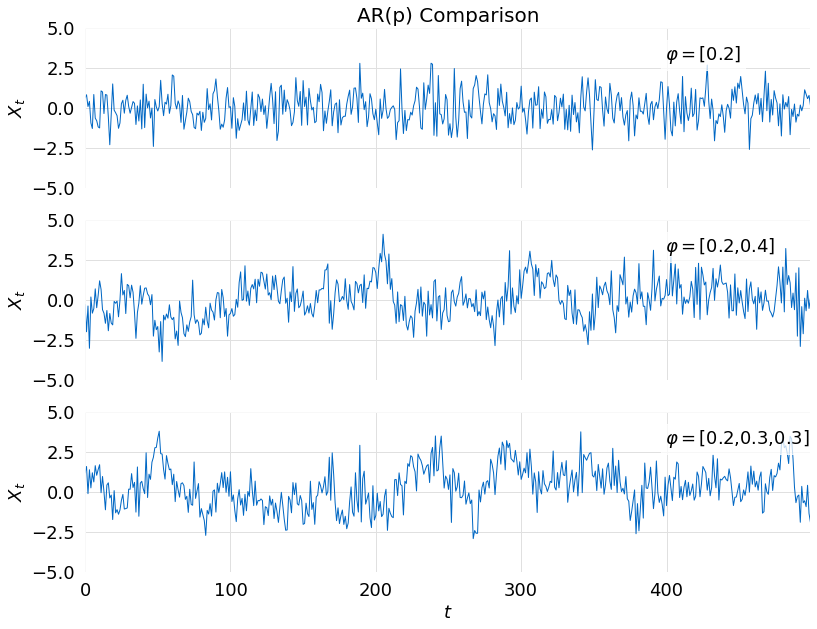

In [3]:
labels = [r"$\varphi=$"+f"{numpy.array2string(φ1, precision=2, separator=',')}",
          r"$\varphi=$"+f"{numpy.array2string(φ2, precision=2, separator=',')}",
          r"$\varphi=$"+f"{numpy.array2string(φ3, precision=2, separator=',')}"]
title = "AR(p) Comparison"
samples = [ar1[:500], ar2[:500], ar3[:500]]
stack(samples, ylim=[-5.0, 5.0], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

## Estimation of $\text{AR}(p)$ Parameters ($\sigma = 1$)

$\text{AR}(p)$ parameters are estimated using two methods. The Yule-Walker ACF and `statsmodels.tsa.arima_model.ARMA`

### AR(1) Example ($\varphi = 0.2$)

In [4]:
arima.yw(ar1, 1)

array([0.19374099])

In [5]:
result = arima.ar_fit(ar1, 1)
result.polynomial_ar, result.bse

(array([ 1.        , -0.19374232]),
 array([0.01247732, 0.00973476, 0.0142718 ]))

In [6]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -14248.776
Date:                Fri, 15 Apr 2022   AIC                          28503.552
Time:                        10:27:14   BIC                          28525.183
Sample:                             0   HQIC                         28510.874
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0111      0.012      0.886      0.376      -0.013       0.036
ar.L1          0.1937      0.010     19.902      0.000       0.175       0.213
sigma2         1.0119      0.014     70.902      0.000       0.984       1.040
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 0.27
Prob(Q):                              0.99   Prob(JB):                         0.87
Heteroskedasticity (H):               0.99   Skew:                             0.01
Prob(H) (two-sided):                  0.77   Kurtosis:                         3.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### AR(2) Example ($\varphi = [0.2, 0.4]$)

In [7]:
arima.yw(ar2, 2)

array([0.18100169, 0.40866149])

In [8]:
result = arima.ar_fit(ar2, 2)
result.polynomial_ar, result.bse

(array([ 1.        , -0.1809547 , -0.40872729]),
 array([0.0244191 , 0.00922551, 0.00910701, 0.0141825 ]))

In [9]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -14210.344
Date:                Fri, 15 Apr 2022   AIC                          28428.688
Time:                        10:27:15   BIC                          28457.529
Sample:                             0   HQIC                         28438.450
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0314      0.024      1.285      0.199      -0.016       0.079
ar.L1          0.1810      0.009     19.615      0.000       0.163       0.199
ar.L2          0.4087      0.009     44.880      0.000       0.391       0.427
sigma2         1.0042      0.014     70.809      0.000       0.976       1.032
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):                 0.12
Prob(Q):                              0.85   Prob(JB):                         0.94
Heteroskedasticity (H):               1.02   Skew:                             0.01
Prob(H) (two-sided):                  0.48   Kurtosis:                         3.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### AR(3) Example ($\varphi = [0.2, 0.3, 0.3]$)

In [10]:
arima.yw(ar3, 3)

array([0.21570911, 0.31475621, 0.28044101])

In [11]:
result = arima.ar_fit(ar3, 3)
result.polynomial_ar, result.bse

(array([ 1.        , -0.2156099 , -0.31484673, -0.28042416]),
 array([0.05302519, 0.00942692, 0.00934917, 0.00968653, 0.01405086]))

In [12]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -14221.258
Date:                Fri, 15 Apr 2022   AIC                          28452.516
Time:                        10:27:15   BIC                          28488.568
Sample:                             0   HQIC                         28464.720
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0460      0.053      0.868      0.386      -0.058       0.150
ar.L1          0.2156      0.009     22.872      0.000       0.197       0.234
ar.L2          0.3148      0.009     33.676      0.000       0.297       0.333
ar.L3          0.2804      0.010     28.950      0.000       0.261       0.299
sigma2         1.0063      0.014     71.618      0.000       0.979       1.034
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.41
Prob(Q):                              0.96   Prob(JB):                         0.49
Heteroskedasticity (H):               1.02   Skew:                             0.01
Prob(H) (two-sided):                  0.48   Kurtosis:                         3.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

## Simulations $\sigma = 5.0$

In [13]:
nsample = 10000
σ = 5.0

φ1 = numpy.array([0.2])
ar1 = arima.arp(φ1, nsample, σ)

φ2 = numpy.array([0.2, 0.4])
ar2 = arima.arp(φ2, nsample, σ)

φ3 = numpy.array([0.2, 0.3, 0.3])
ar3 = arima.arp(φ3, nsample, σ)

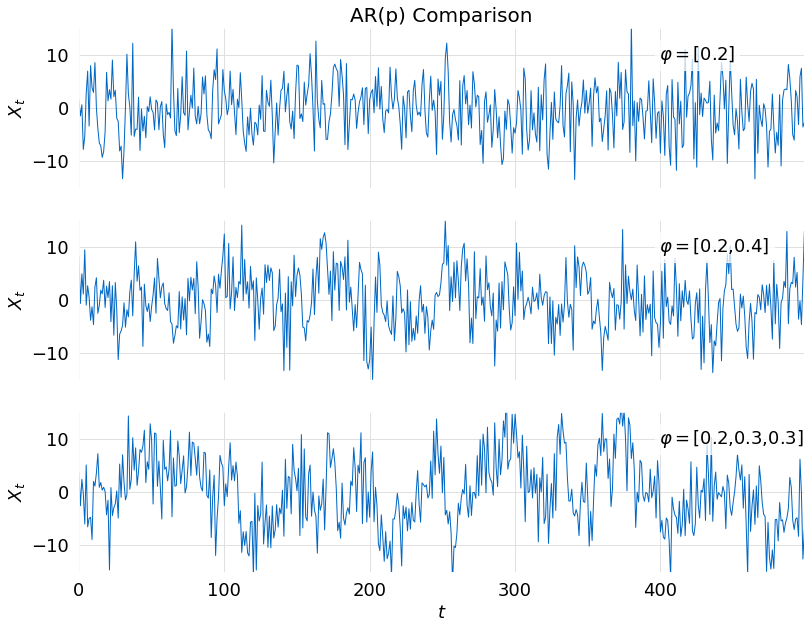

In [14]:
labels = [r"$\varphi=$"+f"{numpy.array2string(φ1, precision=2, separator=',')}",
          r"$\varphi=$"+f"{numpy.array2string(φ2, precision=2, separator=',')}",
          r"$\varphi=$"+f"{numpy.array2string(φ3, precision=2, separator=',')}"]
title = "AR(p) Comparison"
samples = [ar1[:500], ar2[:500], ar3[:500]]
stack(samples, ylim=[-15.0, 15.0], title=title, labels=labels, plot_type=DataPlotType.TIME_SERIES)

### AR(1) Example ($\varphi = 0.2$)

In [15]:
arima.yw(ar1, 1)

array([0.20155377])

In [16]:
result = arima.ar_fit(ar1, 1)
result.polynomial_ar, result.bse

(array([ 1.        , -0.20155346]),
 array([0.06236148, 0.00990173, 0.35381507]))

In [17]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(1, 0, 0)   Log Likelihood              -30236.782
Date:                Fri, 15 Apr 2022   AIC                          60479.564
Time:                        10:27:16   BIC                          60501.195
Sample:                             0   HQIC                         60486.886
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0557      0.062     -0.892      0.372      -0.178       0.067
ar.L1          0.2016      0.010     20.355      0.000       0.182       0.221
sigma2        24.7679      0.354     70.003      0.000      24.074      25.461
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 3.49
Prob(Q):                              0.99   Prob(JB):                         0.17
Heteroskedasticity (H):               0.97   Skew:                             0.04
Prob(H) (two-sided):                  0.38   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### AR(2) Example ($\varphi = [0.2, 0.4]$)

In [18]:
arima.yw(ar2, 2)

array([0.20540172, 0.38876532])

In [19]:
result = arima.ar_fit(ar2, 2)
result.polynomial_ar, result.bse

(array([ 1.        , -0.20525742, -0.3889955 ]),
 array([0.12223842, 0.00913319, 0.00929932, 0.35240942]))

In [20]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(2, 0, 0)   Log Likelihood              -30205.404
Date:                Fri, 15 Apr 2022   AIC                          60418.808
Time:                        10:27:16   BIC                          60447.650
Sample:                             0   HQIC                         60428.571
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0536      0.122     -0.439      0.661      -0.293       0.186
ar.L1          0.2053      0.009     22.474      0.000       0.187       0.223
ar.L2          0.3890      0.009     41.831      0.000       0.371       0.407
sigma2        24.6093      0.352     69.831      0.000      23.919      25.300
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 0.96
Prob(Q):                              0.88   Prob(JB):                         0.62
Heteroskedasticity (H):               0.99   Skew:                            -0.00
Prob(H) (two-sided):                  0.76   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### AR(3) Example ($\varphi = [0.2, 0.3, 0.3]$)

In [21]:
arima.yw(ar3, 3)

array([0.20113291, 0.30045717, 0.29337615])

In [22]:
result = arima.ar_fit(ar3, 3)
result.polynomial_ar, result.bse

(array([ 1.        , -0.20108111, -0.30049905, -0.2933673 ]),
 array([0.24506949, 0.00951131, 0.00923904, 0.00958548, 0.35289713]))

In [23]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                10000
Model:                 ARIMA(3, 0, 0)   Log Likelihood              -30331.089
Date:                Fri, 15 Apr 2022   AIC                          60672.179
Time:                        10:27:17   BIC                          60708.230
Sample:                             0   HQIC                         60684.382
                              - 10000                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0055      0.245     -0.023      0.982      -0.486       0.475
ar.L1          0.2011      0.010     21.141      0.000       0.182       0.220
ar.L2          0.3005      0.009     32.525      0.000       0.282       0.319
ar.L3          0.2934      0.010     30.605      0.000       0.275       0.312
sigma2        25.2371      0.353     71.514      0.000      24.545      25.929
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.01
Prob(Q):                              0.91   Prob(JB):                         0.60
Heteroskedasticity (H):               1.01   Skew:                            -0.01
Prob(H) (two-sided):                  0.87   Kurtosis:                         3.05
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""